In [12]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [5, 5],
'axes.labelsize': 26,
'axes.titlesize':30,
'font.size': 20,
'legend.fontsize': 18,
'xtick.labelsize': 22,
'ytick.labelsize': 22
}
plt.rcParams.update(params)

**Identity Function**

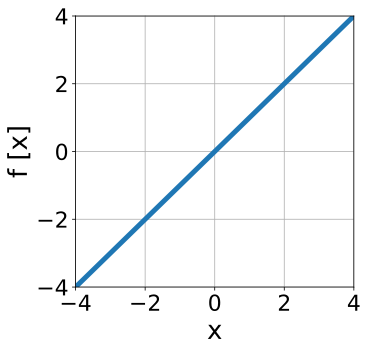

In [137]:
x = np.linspace(-4, 4, 100)
y = x

plt.figure(figsize=(5, 5))
plt.plot(x, y, LineWidth=5, color='#1f77b4')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-4, -2, 0, 2, 4])
plt.xlabel('x')
plt.ylabel('f [x]')
plt.savefig('ann_identity_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Unit (Binary) Step Function**

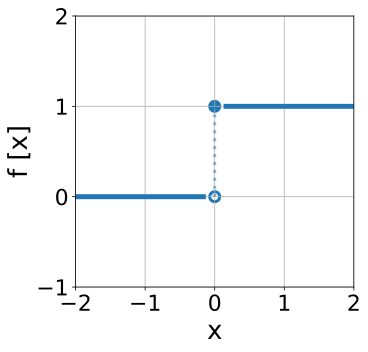

In [148]:
y1 = np.heaviside(x1, 1)
y2 = np.heaviside(x2, 1)
x1 = np.linspace(-4, 0, 50)
x2 = np.linspace(0, 4, 50)

plt.figure(figsize=(5, 5))
plt.plot(x1[:-2], y1[:-2], LineWidth=5, color='#1f77b4')
plt.plot(x2[2:], y2[2:], LineWidth=5, color='#1f77b4')
plt.scatter(0, 0, facecolors='none', edgecolors='#1f77b4', marker='o', s=100, linewidth=3)
plt.scatter(0, 1, facecolors='#1f77b4', edgecolors='#1f77b4', marker='o', s=100, linewidth=3)
plt.plot(np.zeros([50, 1]), np.linspace(0,1,50), ':', LineWidth=3, color='#1f77b4', alpha=0.5)
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-1, 2)
plt.xticks([-2, -1, 0, 1, 2])
plt.yticks([-1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('f [x]')
plt.savefig('ann_unit_step_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Logistic (Sigmoid or Soft Step) Function**

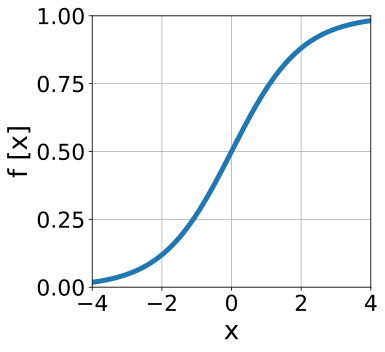

In [136]:
x = np.linspace(-4, 4, 1000)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(5, 5))
plt.plot(x, y, LineWidth=5, color='#1f77b4')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(0, 1)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel('x')
plt.ylabel('f [x]')
plt.savefig('ann_logistic_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()